Name: Dwi Fitria Astari Lubis

Prodigy_DS_04

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [83]:
#Library
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [84]:
#Load Dataset
df = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\PRODIGY_DS_Aug2024\\PRODIGY_DS_Aug2024\\task 4\\twitter_training.csv")
df_val= pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\PRODIGY_DS_Aug2024\\PRODIGY_DS_Aug2024\\task 4\\twitter_validation.csv")

In [85]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [86]:
col_names = ['ID', 'Brand', 'Sentiment', 'Content']
df1 = pd.read_csv('C:\\Users\\Dwi Fitria\\Intern\\PRODIGY_DS_Aug2024\\PRODIGY_DS_Aug2024\\task 4\\twitter_training.csv', names=col_names)

In [87]:
df1.head()

,ID,Brand,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [88]:
df_val.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [89]:
col_names = ['ID', 'Brand', 'Sentiment', 'Content']
df_val1 = pd.read_csv('C:\\Users\\Dwi Fitria\\Intern\\PRODIGY_DS_Aug2024\\PRODIGY_DS_Aug2024\\task 4\\twitter_validation.csv', names=col_names)

In [90]:
df_val1.head()

,ID,Brand,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Brand      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [92]:
df_val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1000 non-null   int64 
 1   Brand      1000 non-null   object
 2   Sentiment  1000 non-null   object
 3   Content    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [93]:
df1.duplicated().sum()

np.int64(2700)

In [94]:
df1.drop_duplicates(inplace=True)

In [95]:
df1.isnull().sum()

ID             0
Brand          0
Sentiment      0
Content      326
dtype: int64

In [96]:
df1.dropna(axis=0 , inplace=True)

In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71656 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         71656 non-null  int64 
 1   Brand      71656 non-null  object
 2   Sentiment  71656 non-null  object
 3   Content    71656 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

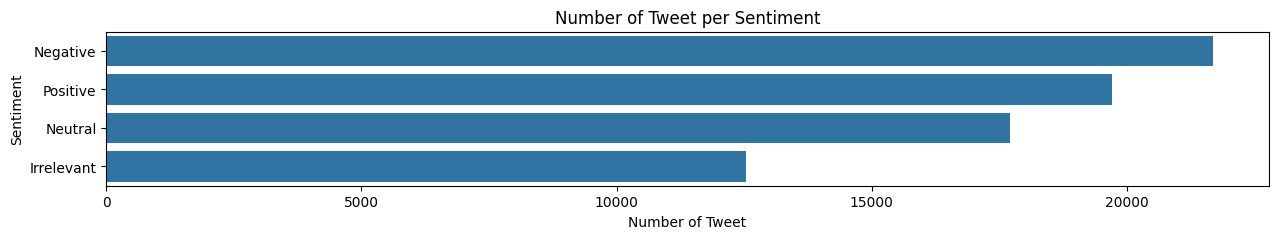

In [98]:
import seaborn as sns

plt.figure(figsize=(15,2))
sns.countplot(y=df1['Sentiment'], order = df1['Sentiment'].value_counts().index)
plt.title('Number of Tweet per Sentiment')
plt.xlabel('Number of Tweet')
plt.ylabel('Sentiment')
plt.show

In [100]:
# Function to preprocess text
import re
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

# Apply preprocessing
df1['Brand'] = df1['Brand'].apply(preprocess_text)
df1['Content'] = df1['Content'].apply(preprocess_text)

In [102]:
#Feature Extraction
#Convert the text data into numerical features using TF-IDF.
df1 = df1.drop(columns=['ID'],axis=1)
df_val1 = df_val1.drop(columns=['ID'],axis=1)